
#Sourced from Kaggle, the dataset contains information chronicling credit card activity.  It is a dataset designed to aid in advanced financial analysis.

#Here is the link to the dataset:  

https://www.kaggle.com/datasets/muhammadehsan000/credit-card-transaction-records-dataset  

#Over 1.25 million rows of data are present with variables thought to relate to information on people who made credit card purchases.

#The data was collected from January 1st, 2019 to June 21st, 2020.  

#Examples of variables include merchant, category, amount, as well as demographic information about the individual making purchases.

#I decided to perform an exploratory data analysis to begin to get a sense of this data.  

#Specifically, I wanted to get a better understanding of what variables are associated with fraudulent credit card activity.  




In [1]:

#Import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [2]:
#Bringing in the dataset
credit = pd.read_csv('credit_card_purchases.csv')

In [3]:
#Viewing variables and their types with info()
credit.info()  

#The table below shows only the merch_zipcode variable has missing data

#If this variable is important to our analysis, we may need to use some form of imputation.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
#Here is a description of the 23 variables of interest

 # 0   Unnamed:               Index  
 # 1   trans_date_trans_time  Timestamp of the transaction
 # 2   cc_num                 Credit card number (hashed or anonymized) 
 # 3   merchant               Merchant or store where the transaction occurred
 # 4   category               Type of transaction (e.g., grocery, entertainment)
 # 5   amt                    Amount of the transaction
 # 6   first                  First name of the cardholder
 # 7   last                   Last name of the cardholder
 # 8   gender                 Gender of the cardholder 
 # 9   street                 Address details of the cardholder 
 # 10  city                   City of cardholder
 # 11  state                  State of cardholder
 # 12  zip                    Zip of cardholder 
 # 13  lat                    Latitude of residence
 # 14  long                   Longitude of residence
 # 15  city_pop               City population where the cardholder lives  
 # 16  job                    Job the cardholder has
 # 17  dob                    Date of Birth of cardholder 
 # 18  trans_num              Transaction Number of the purchase 
 # 19  unix_time              Unix time of the purchase   
 # 20  merch_lat              Latitude of merchant
 # 21  merch_long             Longitude of merchant
 # 22  is_fraud               Whether the purchase was fraudulent or not (0 is not fraudulent, 1 is fraudulent) 
 # 23  merch_zipcode          Zipcode of the merchant

 

In [5]:
#Viewing the first 5 rows of dataset
credit.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:

#Sum of the missing values for each variable yields no missing values.   

credit.isna().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [8]:
#Fix the names of merchants so that consistently they do not have a preceding fraud_ since the is_fraud column identifies that for us

credit["merchant"] = credit["merchant"].str.strip("fraud_")


In [9]:
#Look at the breakdown of the gender variable by transaction

credit["gender"].value_counts()



gender
F    709863
M    586812
Name: count, dtype: int64

In [10]:
#Find the exact percentage of females in the dataset
credit["gender"].value_counts(normalize=True)*100

#55% of the participants are female.  This is a roughly equal split.  

gender
F    54.744867
M    45.255133
Name: proportion, dtype: float64

In [11]:
#Get the number of transactions by category

credit["category"].value_counts()


category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [12]:
#Get the percentages of the types of transactions by category 

credit["category"].value_counts(normalize=True)*100

#The top categories are gas_transport, grocery_pos, home

category
gas_transport     10.153585
grocery_pos        9.535003
home               9.494669
shopping_pos       8.997783
kids_pets          8.717296
shopping_net       7.522548
entertainment      7.250390
food_dining        7.053502
personal_care      6.999287
health_fitness     6.623017
misc_pos           6.143020
misc_net           4.880714
grocery_net        3.505273
travel             3.123913
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Counts of the Category Variable')

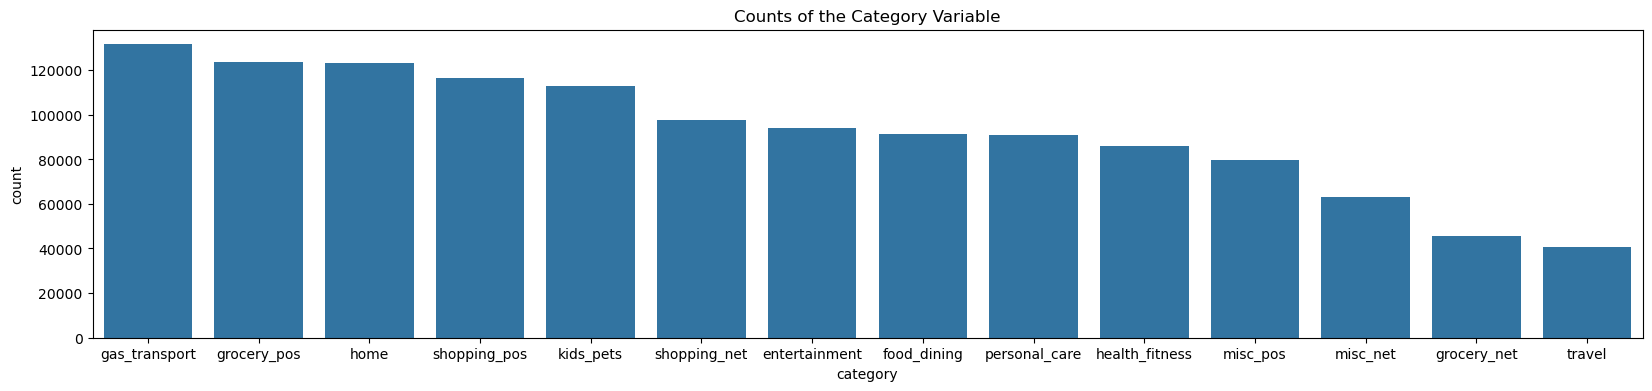

In [13]:
#Create a barplot of counts of the category variable by transaction for the 14 categories


plt.figure(figsize=(20, 4))
sns.countplot(data=credit, x='category', order=credit['category'].value_counts(ascending=False).index)
plt.title('Counts of the Category Variable')

 

C:\Users\micha\AppData\Local\Temp\ipykernel_5616\1581683013.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)


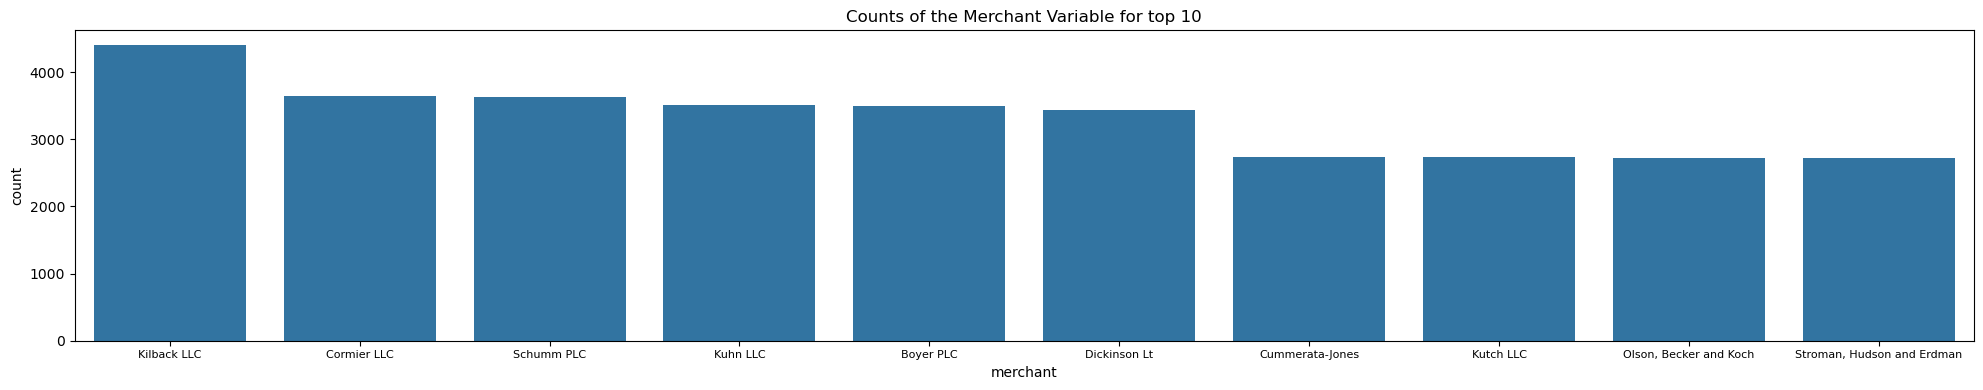

In [14]:
# Count plot of the top 10 merchants based on transaction activity

plt.figure(figsize=(20, 4))
ax=  sns.countplot(data=credit, x='merchant', order=credit['merchant'].value_counts(ascending=False).iloc[:10].index)
plt.title('Counts of the Merchant Variable for top 10')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()





Text(0.5, 1.0, 'Counts of the City Variable for top 10')

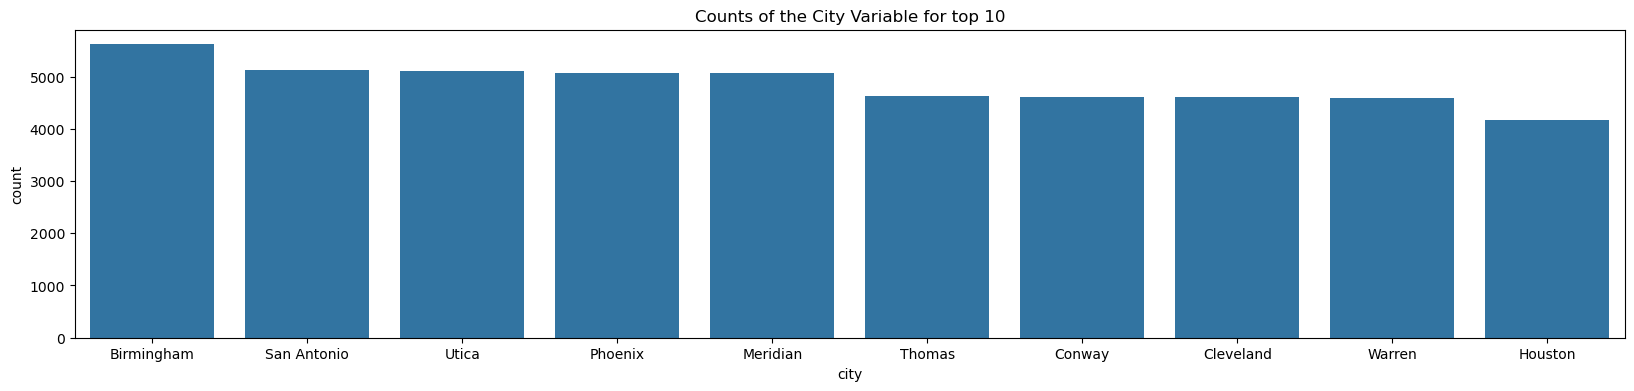

In [15]:
# Count plot of the top 10 cities where cardholder lives based on transaction activity

plt.figure(figsize=(20, 4))
sns.countplot(data=credit, x='city', order=credit['city'].value_counts(ascending=False).iloc[:10].index)
plt.title('Counts of the City Variable for top 10')

Text(0.5, 1.0, 'Counts of the State Variable for top 10')

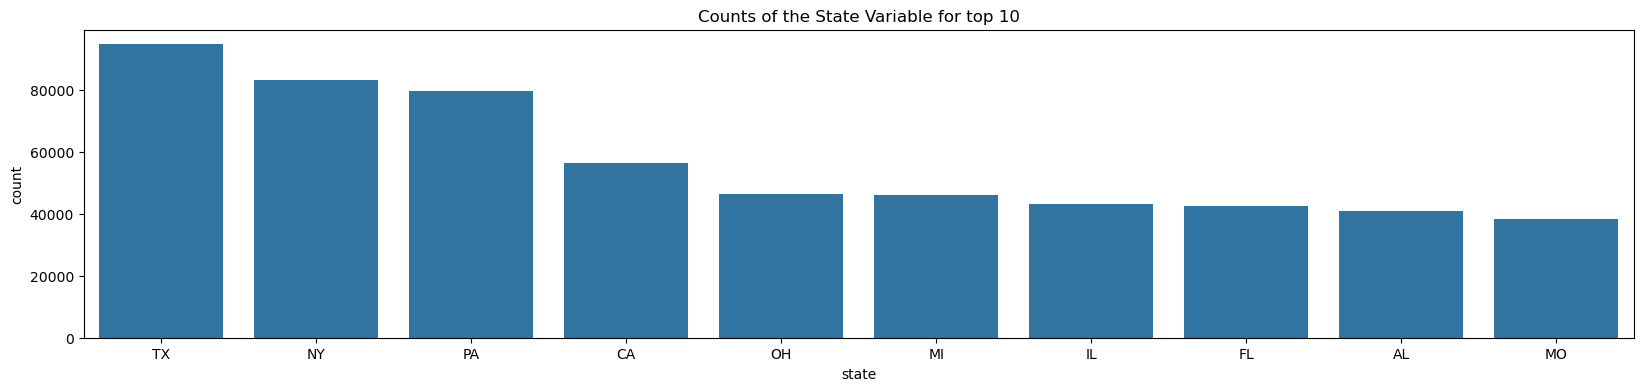

In [16]:

# Count plot of the top 10 states where cardholder lives based on transaction activity

plt.figure(figsize=(20, 4))
sns.countplot(data=credit, x='state', order=credit['state'].value_counts(ascending=False).iloc[:10].index)
plt.title('Counts of the State Variable for top 10')

C:\Users\micha\AppData\Local\Temp\ipykernel_5616\1482631393.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  jobs.set_xticklabels(ax.get_xticklabels(), fontsize=8)


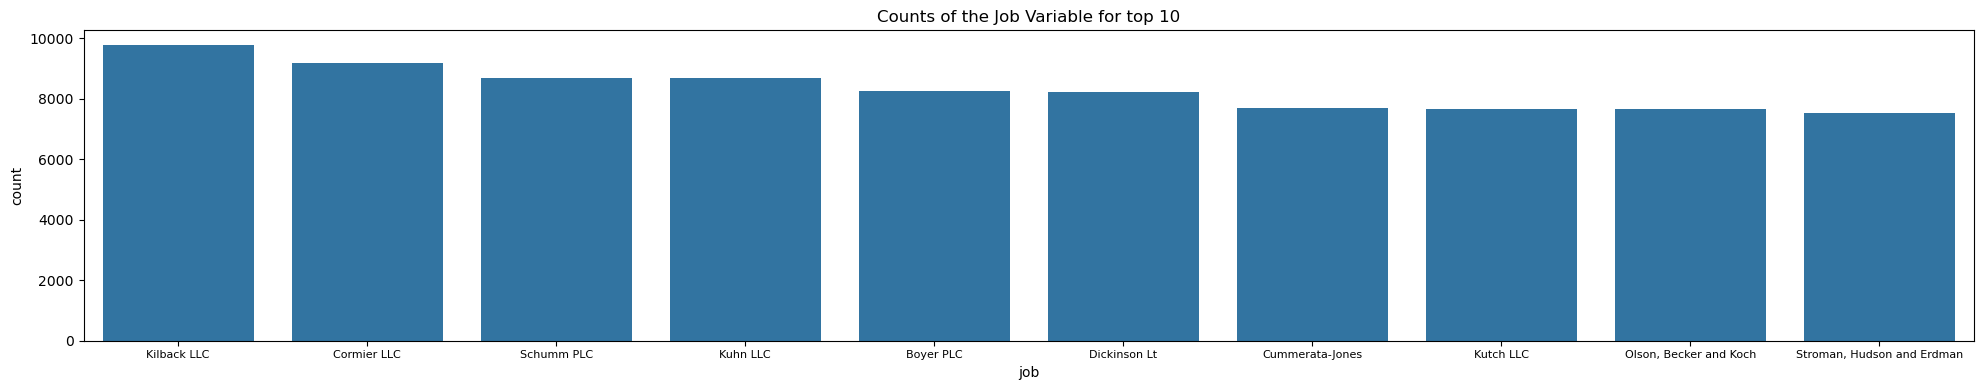

In [17]:
# Count plot of the top 10 jobs held by the cardholder based on transaction activity


plt.figure(figsize=(20, 4))
jobs= sns.countplot(data=credit, x='job', order=credit['job'].value_counts(ascending=False).iloc[:10].index)
plt.title('Counts of the Job Variable for top 10')

jobs.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()


In [18]:
credit["is_fraud"].value_counts(normalize=True)*100

#We see that over 99 percent of the transactions are not fraudulent 

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

In [19]:
#Mean amount per transaction is roughly 25 dollars

credit["amt"].value_counts().mean()

24.498847490931077

In [20]:
#Mean amount spent for each level of the is_fraud variable

#Fraudulent transactions are of a much higher amount 

credit.groupby('is_fraud')['amt'].mean()


is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

Text(0, 0.5, 'dollar amount')

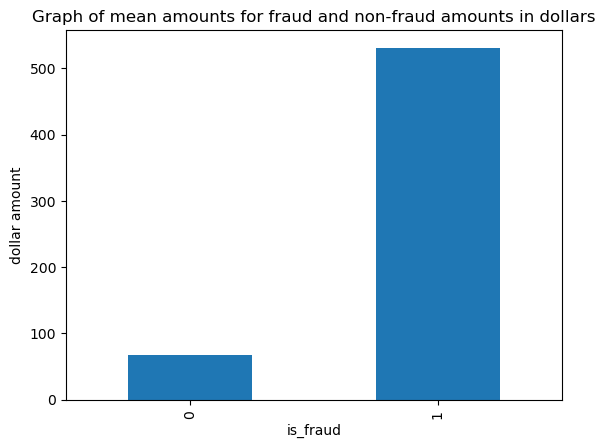

In [21]:
#This is a graphical demonstration of this phenomenon described above 

credit.groupby('is_fraud')['amt'].mean().plot(kind="bar")
plt.title("Graph of mean amounts for fraud and non-fraud amounts in dollars")
plt.ylabel("dollar amount")


In [22]:

#This analysis is the catylst for the creation now of a "full name" variable since we observe that multiple credit cards are used repeatedly

#likely meaning that the same people are making multiple purchases.  



In [23]:
#Creation of a full name variable throught concatenation of the first and last name so we can link the credit card to the individual

credit["full_name"] = credit["first"] + " " + credit["last"]

In [24]:
#Check for creation of newly created full name variable

credit.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,full_name
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,Jennifer Banks
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,Stephanie Gill
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,Edward Sanchez
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,Jeremy White
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,Tyler Garcia


In [25]:
credit["full_name"].nunique()


#The roughly 1.25 million transactions were made by 973 unique individuals 

973

In [26]:
#Get breakdown of how many people are each gender by person

a= credit.groupby(credit["gender"]).full_name.agg(["nunique"])

a

# Roughly 50 percent are females and fifty percent are males.  




,nunique
gender,
F,492
M,481


In [27]:
#Show only the fraudulent purchases

frauds = credit[credit["is_fraud"]==1]

frauds

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,full_name
2449,2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,28644.0,Jason Murphy
2472,2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,78055.0,Misty Hart
2523,2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,78039.0,Misty Hart
2546,2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,28777.0,Jason Murphy
2553,2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,78006.0,Misty Hart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1,NaN,Ashley Cabrera
1295491,1295491,2020-06-21 01:53:35,3524574586339330,Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1,NaN,Ashley Cabrera
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1,70392.0,William Perry
1295666,1295666,2020-06-21 03:26:20,3560725013359375,Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1,NaN,Brooke Smith


In [28]:
#Show only non-fraudulent purchases
non_frauds = credit[credit["is_fraud"]==0]

non_frauds

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,full_name
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,Jennifer Banks
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,Stephanie Gill
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,Edward Sanchez
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,Jeremy White
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN,Erik Patterson
1296671,1296671,2020-06-21 12:12:19,6011149206456997,Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,Jeffrey White
1296672,1296672,2020-06-21 12:12:32,3514865930894695,Stiedemann Lt,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,Christopher Castaneda
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,Joseph Murray


In [29]:
#Breakdown of gender for the non_frauds

non_frauds["gender"].value_counts()

gender
F    706128
M    583041
Name: count, dtype: int64

In [30]:
#Top 10 cities for fraudulent purchases

frauds["city"].value_counts(ascending=False).head(10)

city
Houston       39
Warren        33
Huntsville    29
Naples        29
Dallas        27
Tulsa         27
Topeka        27
Detroit       26
Utica         25
Randolph      25
Name: count, dtype: int64

In [31]:
#Top 10 cities for non-fraudulent purchases

non_frauds["city"].value_counts(ascending=False).head(10)

city
Birmingham     5606
San Antonio    5105
Utica          5080
Phoenix        5073
Meridian       5047
Thomas         4620
Conway         4596
Cleveland      4586
Warren         4566
Burbank        4141
Name: count, dtype: int64

In [32]:
#Top 10 states for fradulent purchases

frauds["state"].value_counts(ascending=False).head(10)

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: count, dtype: int64

In [33]:
#Top 10 states for non-fraudulent purchases

non_frauds["state"].value_counts(ascending=False).head(10)

state
TX    94397
NY    82946
PA    79389
CA    56034
OH    46159
MI    45916
IL    43004
FL    42390
AL    40774
MO    38212
Name: count, dtype: int64

In [34]:
#Breakdown of merchants most targeted in fraud

frauds.groupby('merchant')['amt'].mean().sort_values(ascending=False).head(10)



merchant
Fisher Inc                         1039.242286
Altenwerth, Cartwright and Koss    1030.005000
Medhurst PLC                       1026.265152
Kuhic, Bins and Pfeffe             1022.197179
Gottlieb, Considine and Schultz    1022.034571
Kuhic LLC                          1019.616923
Auer-West                          1018.657500
Schmidt and Sons                   1017.940833
Boyer-Reichert                     1013.500526
Jast Lt                            1013.341429
Name: amt, dtype: float64

In [35]:
#Table showing the number of fraudulent purchases for each credit card number

frauds.groupby('cc_num').count()['trans_date_trans_time'].sort_values(ascending=False)

#There were 762 credit card numbers that engaged in fraudulent purchases.  This table shows the number of transactions that were fraudulent 
#for each credit card.  

#We see that no credit card engaged in more than 19 fraudulent purchases.  





cc_num
3520550088202337       19
4593569795412          19
4260128500325          18
30074693890476         16
2720433095629877       16
                       ..
6011109736646996        2
4503101193493052864     2
3576431665303017        2
4089096483689733451     2
4809701904914           2
Name: trans_date_trans_time, Length: 762, dtype: int64

In [36]:
#Create a new dataset called mult representing counts and unique fraudulent payments for each individual 

mult= credit.groupby(credit["full_name"]).is_fraud.agg([ 
                                               "count", 
                                             "nunique"])

mult

#A "2" in the nunique below indicates you are both on the frauds table and the non-frauds table 






,count,nunique
full_name,,
Aaron Murray,2050,2
Aaron Pena,1476,1
Aaron Rogers,508,2
Aaron Stewart,537,2
Adam Keller,521,2
...,...,...
William Thompson,2052,2
Willie Jordan,1038,2
Xavier Beltran,1516,2


In [37]:
mult[mult["nunique"]==1]   

#Print all the rows that are only either on the frauds table exclusively
#or on the non-frauds table exclusively.  



,count,nunique
full_name,,
Aaron Pena,1476,1
Adam Santos,2603,1
Alex Singh,10,1
Alex White,515,1
Alicia Bishop,1524,1
...,...,...
Vanessa Anderson,1007,1
Veronica Burton,518,1
Vincent Cain,507,1


In [38]:

mult[mult["nunique"]==2]   

#Print all the rows that are on both the frauds and the non-frauds table 

#We observe below that roughly 2/3 of the people in the study have made both fraudulent and non-fraudulent purchases.  



,count,nunique
full_name,,
Aaron Murray,2050,2
Aaron Rogers,508,2
Aaron Stewart,537,2
Adam Keller,521,2
Adam Kirk,1556,2
...,...,...
William Thompson,2052,2
Willie Jordan,1038,2
Xavier Beltran,1516,2


In [39]:
#Print the mean of the amount column for fraudulent purchases

frauds["amt"].mean()

531.3200919264589

In [40]:
#Print the mean of the amount column for non-fraudulent purchases 

non_frauds["amt"].mean()

# Not surprisingly, the mean amount spent on fraudulent purchases is much higher than non-fraudulent purchases. 

67.6671098126002

In [41]:
# Show the merchants with most activity in descending order (for both fraudulent and nonfraudulent purchases)

credit["merchant"].value_counts().sort_values(ascending=False)

merchant
Kilback LLC                       4403
Cormier LLC                       3649
Schumm PLC                        3634
Kuhn LLC                          3510
Boyer PLC                         3493
                                  ... 
Douglas, DuBuque and McKenzie      775
Treutel-King                       775
Medhurst, Labadie and Gottlieb     759
Reichert-Weissnat                  753
Hahn, Douglas and Schowalte        727
Name: count, Length: 693, dtype: int64

In [42]:
#Show the value counts in descending order for merchants with the most activity engaging in fraud 

frauds["merchant"].value_counts().sort_values(ascending=False)

merchant
Rau and Sons                      49
Kozey-Boehm                       48
Cormier LLC                       48
Doyle Lt                          47
Vandervort-Funk                   47
                                  ..
Kihn-Fritsch                       1
Ortiz Group                        1
Bednar Inc                         1
Stokes, Christiansen and Sipes     1
Hills-Olson                        1
Name: count, Length: 679, dtype: int64

In [43]:
#Show the value counts in descending order for merchants with the most activity engaging in non-fraudulent purchases


non_frauds["merchant"].value_counts().sort_values(ascending=False)

merchant
Kilback LLC                       4356
Schumm PLC                        3603
Cormier LLC                       3601
Kuhn LLC                          3466
Boyer PLC                         3453
                                  ... 
Treutel-King                       773
Douglas, DuBuque and McKenzie      772
Medhurst, Labadie and Gottlieb     757
Reichert-Weissnat                  753
Hahn, Douglas and Schowalte        723
Name: count, Length: 693, dtype: int64

In [44]:
#Drop columns that are unnecessary for the overall credit dataset

#This new dataset is called credit_revised 

credit_revised= credit.drop(credit.columns[[0,13,14, 19,20,21]], axis = 1)
credit_revised 
credit_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  city_pop               1296675 non-null  int64  
 13  job                    1296675 non-null  object 
 14  dob               

In [45]:
#Drop columns that are unnecessary for the frauds dataset

frauds_revised= frauds.drop(frauds.columns[[0,13,14,19,20,21]], axis = 1)
frauds_revised
frauds_revised.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   int64  
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   street                 7506 non-null   object 
 9   city                   7506 non-null   object 
 10  state                  7506 non-null   object 
 11  zip                    7506 non-null   int64  
 12  city_pop               7506 non-null   int64  
 13  job                    7506 non-null   object 
 14  dob                    7506 non-null   object 
 15  tra

In [46]:
#Drop columns that are unnecessary for the non_frauds dataset

non_fraudsrev= non_frauds.drop(non_frauds.columns[[0,13,14,19,20,21]], axis = 1)
non_fraudsrev
non_fraudsrev.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1289169 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1289169 non-null  object 
 1   cc_num                 1289169 non-null  int64  
 2   merchant               1289169 non-null  object 
 3   category               1289169 non-null  object 
 4   amt                    1289169 non-null  float64
 5   first                  1289169 non-null  object 
 6   last                   1289169 non-null  object 
 7   gender                 1289169 non-null  object 
 8   street                 1289169 non-null  object 
 9   city                   1289169 non-null  object 
 10  state                  1289169 non-null  object 
 11  zip                    1289169 non-null  int64  
 12  city_pop               1289169 non-null  int64  
 13  job                    1289169 non-null  object 
 14  dob                    

In [47]:
#Back to the frauds dataset we revised:

#Transforming the dob variable to datetime format 


from datetime import date
frauds_revised["dob"] = pd.to_datetime(frauds_revised["dob"])
frauds_revised.info()








<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  7506 non-null   object        
 1   cc_num                 7506 non-null   int64         
 2   merchant               7506 non-null   object        
 3   category               7506 non-null   object        
 4   amt                    7506 non-null   float64       
 5   first                  7506 non-null   object        
 6   last                   7506 non-null   object        
 7   gender                 7506 non-null   object        
 8   street                 7506 non-null   object        
 9   city                   7506 non-null   object        
 10  state                  7506 non-null   object        
 11  zip                    7506 non-null   int64         
 12  city_pop               7506 non-null   int64         
 13  jo

In [48]:
#Create a year variable from the dob variable on the frauds_revised dataset.  

In [49]:


frauds_revised["dob_year"]=  frauds_revised["dob"].dt.year
frauds_revised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  7506 non-null   object        
 1   cc_num                 7506 non-null   int64         
 2   merchant               7506 non-null   object        
 3   category               7506 non-null   object        
 4   amt                    7506 non-null   float64       
 5   first                  7506 non-null   object        
 6   last                   7506 non-null   object        
 7   gender                 7506 non-null   object        
 8   street                 7506 non-null   object        
 9   city                   7506 non-null   object        
 10  state                  7506 non-null   object        
 11  zip                    7506 non-null   int64         
 12  city_pop               7506 non-null   int64         
 13  jo

In [50]:
frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960


In [51]:
# Converting the trans_date_trans_time variable to the datetime format.  

frauds_revised['trans_date_trans_time'] = pd.to_datetime(frauds_revised['trans_date_trans_time'])
frauds_revised.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  7506 non-null   datetime64[ns]
 1   cc_num                 7506 non-null   int64         
 2   merchant               7506 non-null   object        
 3   category               7506 non-null   object        
 4   amt                    7506 non-null   float64       
 5   first                  7506 non-null   object        
 6   last                   7506 non-null   object        
 7   gender                 7506 non-null   object        
 8   street                 7506 non-null   object        
 9   city                   7506 non-null   object        
 10  state                  7506 non-null   object        
 11  zip                    7506 non-null   int64         
 12  city_pop               7506 non-null   int64         
 13  jo

In [52]:
#Creation of a day variable from the frauds_revised trans_date_trans_time column
#In order to view fraudulent transaction activity by day of week 

frauds_revised['Day of Week'] = frauds_revised['trans_date_trans_time'].dt.day_name()

frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,city_pop,job,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,28611,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,78208,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,78208,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,28611,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,78208,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday


In [53]:
# Get data showing the sum of the fraudulent purchases for every day of the week.

#Specifically, are there more fraudulent purchases on the weekends?  

grouped_by_day = frauds_revised[frauds_revised["amt"] > 0].groupby('Day of Week')['amt'].sum()
grouped_by_day

Day of Week
Friday       581816.53
Monday       610146.66
Saturday     636539.35
Sunday       663864.01
Thursday     544490.00
Tuesday      501650.80
Wednesday    449581.26
Name: amt, dtype: float64

In [54]:
#Creation of sorted_grouped_by_day which sorts the total fraudulent amounts by day from highest to lowest

sorted_grouped_by_day = grouped_by_day.sort_values(ascending=False)
sorted_grouped_by_day

#The greatest dollar amounts of fraudulent purchases occcured on the weekend

Day of Week
Sunday       663864.01
Saturday     636539.35
Monday       610146.66
Friday       581816.53
Thursday     544490.00
Tuesday      501650.80
Wednesday    449581.26
Name: amt, dtype: float64

In [55]:
# Produce data to show which day of week has most fraudulent transactions 

grouped_by_day_counts = frauds_revised[frauds_revised["amt"] > 0].groupby('Day of Week')['amt'].count()
grouped_by_day_counts

Day of Week
Friday       1079
Monday       1182
Saturday     1227
Sunday       1216
Thursday     1008
Tuesday       935
Wednesday     859
Name: amt, dtype: int64

In [56]:
#We now sort this data in descending order and see that the most fraudulent transactions occured on the weekends.  

sorted_grouped_by_day_counts = grouped_by_day_counts.sort_values(ascending=False)
sorted_grouped_by_day_counts

Day of Week
Saturday     1227
Sunday       1216
Monday       1182
Friday       1079
Thursday     1008
Tuesday       935
Wednesday     859
Name: amt, dtype: int64

In [57]:
##This step calculates an age in days

#We need to determine age based on transaction date because the date range in the study is from 2018 to 2020.  



frauds_revised['ageindays'] = (frauds_revised['trans_date_trans_time'] - frauds_revised['dob']).dt.days
#frauds_revised.info()
frauds_revised.head()







,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week,ageindays
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday,11066
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday,21250
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday,21250
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday,11066
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday,21250


In [58]:
# Create age in years 

frauds_revised["yearlyage"]=frauds_revised["ageindays"] / 365

In [59]:
frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week,ageindays,yearlyage
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday,11066,30.317808
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday,21250,58.219178
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday,21250,58.219178
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday,11066,30.317808
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday,21250,58.219178


In [60]:
#Round the age to the nearest year

frauds_revised["agerounded"] = round(frauds_revised["yearlyage"], 0)
frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week,ageindays,yearlyage,agerounded
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday,11066,30.317808,30.0
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday,11066,30.317808,30.0
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0


In [61]:
#Mean age in years is seen to be 49 for people making fraudulent purchases.  

round(frauds_revised["agerounded"].mean(), 0)

49.0

In [62]:
frauds_revised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  7506 non-null   datetime64[ns]
 1   cc_num                 7506 non-null   int64         
 2   merchant               7506 non-null   object        
 3   category               7506 non-null   object        
 4   amt                    7506 non-null   float64       
 5   first                  7506 non-null   object        
 6   last                   7506 non-null   object        
 7   gender                 7506 non-null   object        
 8   street                 7506 non-null   object        
 9   city                   7506 non-null   object        
 10  state                  7506 non-null   object        
 11  zip                    7506 non-null   int64         
 12  city_pop               7506 non-null   int64         
 13  jo

In [63]:
frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week,ageindays,yearlyage,agerounded
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday,11066,30.317808,30.0
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday,11066,30.317808,30.0
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday,21250,58.219178,58.0


In [64]:
frauds_revised = frauds_revised.drop(['ageindays', 'yearlyage'], axis=1)

In [65]:
frauds_revised.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,is_fraud,merch_zipcode,full_name,dob_year,Day of Week,agerounded
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1,28644.0,Jason Murphy,1988,Wednesday,30.0
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1,78055.0,Misty Hart,1960,Wednesday,58.0
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1,78039.0,Misty Hart,1960,Wednesday,58.0
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1,28777.0,Jason Murphy,1988,Wednesday,30.0
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parke,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1,78006.0,Misty Hart,1960,Wednesday,58.0


In [66]:
#For each zipcode, produce information that shows the mean amount of fraudulent purchases for each zipcode.  

#Then, sort the data by decreasing amount and display the top five zipcodes.   

mean_amount_per_zipcode = frauds_revised.groupby('zip')['amt'].mean()
mean_amount_per_zipcode.sort_values(ascending=False).head(5)

zip
75246    948.818182
13752    926.156667
16428    918.425556
49613    899.408571
17088    897.211111
Name: amt, dtype: float64

In [67]:
credit_revised['trans_date_trans_time'] = pd.to_datetime(credit_revised['trans_date_trans_time'])
credit_revised.describe()

#We see that the purchases on the credit dataset ranged from New Year's Day of 2019 to June 21st, 2020.  


,trans_date_trans_time,cc_num,amt,zip,city_pop,is_fraud,merch_zipcode
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,8.882444e+04,5.788652e-03,4.682575e+04
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.300000e+01,0.000000e+00,1.001000e+03
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,7.430000e+02,0.000000e+00,2.511400e+04
50%,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,2.456000e+03,0.000000e+00,4.586000e+04
75%,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,2.032800e+04,0.000000e+00,6.831900e+04
max,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,2.906700e+06,1.000000e+00,9.940300e+04
std,NaN,1.308806e+18,1.603160e+02,2.689322e+04,3.019564e+05,7.586269e-02,2.583400e+04


In [68]:
#Key Points from EDA


#	 Fraudulent activity is up on the weekends

#	 The credit card transactions are roughly evenly divided between men and women. 

#	 Over 99 percent of the transactions were non-fraudulent.  Less than one percent were fraudulent.  

#	 The mean amount for a fraudulent transaction is roughly eight times the mean amount for a nonfraudulent transaction (531 vs: 67 dollars)

#	 There were 973 unique individuals who made purchases using a credit card.  They made over 1.25 million transactions.  
#    This averages to 1285 purchases per individual.  This is not surprising given that the credit card dataset extends over a 1.5 year period of time.

#	 Of those 973 individuals, it is again roughly an even split between males and females. 

#	 We see that no credit card engaged in more than 19 fraudulent purchases.  

#	 Of the 973 individuals who made credit card purchases, we observe that roughly 2/3 or 682 people were individuals who engaged in both fraudulent 
#    and non-fraudulent purchases.  We need to better understand these individuals as it’s unclear whether they were truly fraudulent purchases or 
#    inadvertent errors made by the purchaser.  

#	 The remaining 291 people made either exclusively fraudulent purchases or exclusively non-fraudulent purchases.

 


